<a href="https://colab.research.google.com/github/Khosyi0/bike-sharing-analysis/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis Project: Bike Sharing
- **Name:** Achmad Khosyi' Assajjad Ramandanta
- **Email:** ramandanta@gmail.com
- **ID Dicoding:** khosyi_hxkry

## Defining Business Questions

1. What is the distribution of the number of bicycles borrowed based on season (Spring, Summer, Fall, Winter) in 2011 and 2012? Is there a trend of increasing or decreasing the number of bicycle loans from year to year? Are there certain seasons that have a significant impact on the number of bikes borrowed?
2. Is there a correlation between the type of weather (Clear, Mist, LightSnow, HeavyRain) and the number of bicycles borrowed? What is the distribution of the number of bicycles borrowed in different weather conditions? Does temperature or humidity affect the number of bicycles borrowed?

## Import all used packages/libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

## Data Wrangling
Collecting all available data.

### Gathering Data
Imports data and displays a preview of the top 5 data.

In [2]:
day_df = pd.read_csv("https://raw.githubusercontent.com/Khosyi0/bike-sharing-analysis/main/data/day.csv")
day_df_raw = pd.read_csv("https://raw.githubusercontent.com/Khosyi0/bike-sharing-analysis/main/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/Khosyi0/bike-sharing-analysis/main/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Assess `day_df` table
Check whether there is data that has no value or is duplicated.

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Assess `hour_df` table

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

#### Clean up the `day_df` table

##### Duplicate Data

In [12]:
day_df.duplicated().sum()

0

##### Missing Values

In [13]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##### Inaccurate value
Changes the value to a string because it has its own name.

In [14]:
day_df['yr'] = day_df['yr'].replace({0: 2011, 1: 2012})
day_df['season'] = day_df['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
day_df['weekday'] = day_df['weekday'].replace({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
day_df['weathersit'] = day_df['weathersit'].replace({1: 'Clear', 2: 'Mist', 3: 'LightSnow', 4: 'HeavyRain'})
day_df['mnth'] = day_df['mnth'].replace({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})

In [15]:
day_df.describe()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2011.500684,0.028728,0.683995,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,0.500342,0.167155,0.465233,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,2011.000000,0.000000,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011.000000,0.000000,0.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012.000000,0.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012.000000,0.000000,1.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012.000000,1.000000,1.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Clean up `hour_df` table

##### Duplicate Data

In [16]:
hour_df.duplicated().sum()

0

##### Missing Values

In [17]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##### Inaccurate value

In [18]:
hour_df['yr'] = hour_df['yr'].replace({0: 2011, 1: 2012})
hour_df['season'] = hour_df['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
hour_df['weekday'] = hour_df['weekday'].replace({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
hour_df['weathersit'] = hour_df['weathersit'].replace({1: 'Clear', 2: 'Mist', 3: 'LightSnow', 4: 'HeavyRain'})
hour_df['mnth'] = hour_df['mnth'].replace({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})

In [19]:
hour_df.describe()

,instant,yr,hr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2011.502561,11.546752,0.028770,0.682721,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,0.500008,6.914405,0.167165,0.465431,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,2011.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011.000000,6.000000,0.000000,0.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012.000000,12.000000,0.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012.000000,18.000000,0.000000,1.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## Exploratory Data Analysis (EDA)

### Explore `day_df`

In [20]:
# Shows examples of 5 random data.
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
496,497,2012-05-11,Summer,2012,May,0,Friday,1,Clear,0.533333,0.520833,0.360417,0.236937,1319,5711,7030
446,447,2012-03-22,Summer,2012,March,0,Thursday,1,Clear,0.554167,0.531567,0.831250,0.117562,1334,5537,6871
702,703,2012-12-03,Winter,2012,December,0,Monday,1,Clear,0.452500,0.455796,0.767500,0.082721,555,5679,6234
477,478,2012-04-22,Summer,2012,April,0,Sunday,0,LightSnow,0.396667,0.389504,0.835417,0.344546,120,907,1027
441,442,2012-03-17,Spring,2012,March,0,Saturday,0,Mist,0.514167,0.505046,0.755833,0.110704,3155,4681,7836


In [21]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731.000000,731,731.000000,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,4,NaN,12,NaN,7,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,Fall,NaN,January,NaN,Saturday,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,188,NaN,62,NaN,105,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,2011.500684,NaN,0.028728,NaN,0.683995,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,NaN,0.500342,NaN,0.167155,NaN,0.465233,NaN,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,NaN,2011.000000,NaN,0.000000,NaN,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,NaN,2011.000000,NaN,0.000000,NaN,0.000000,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,NaN,2012.000000,NaN,0.000000,NaN,1.000000,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,NaN,2012.000000,NaN,0.000000,NaN,1.000000,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [22]:
# Checks whether the ID is unique
day_df.instant.is_unique

True

In [23]:
# Comparing the number of bicycles borrowed in each season in 2011 and 2012.
day_df.groupby(['season', 'yr']).agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
})

casual  registered     cnt
season yr                              
Fall   2011   95450      324200  419650
       2012  130641      510838  641479
Spring 2011   21425      128575  150000
       2012   39197      282151  321348
Summer 2011   77564      269752  347316
       2012  125958      445315  571273
Winter 2011   52813      273324  326137
       2012   76969      438507  515476

In [24]:
# Comparing the number of bicycles borrowed in certain weather conditions in 2011 and 2012.
day_df.groupby(['weathersit', 'yr']).agg({
    'cnt': 'sum'
}).reset_index()

,weathersit,yr,cnt
0,Clear,2011,835067
1,Clear,2012,1422885
2,LightSnow,2011,25112
3,LightSnow,2012,12757
4,Mist,2011,382924
5,Mist,2012,613934


In [25]:
# Comparing the number of bicycles borrowed in certain hummid conditions in 2011 and 2012.
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
labels = ['0 ≤ x < 20', '20 ≤ x < 40', '40 ≤ x < 60', '60 ≤ x < 80', '80 ≤ x ≤ 100']
day_df['hum_interval'] = pd.cut(day_df['hum'], bins=bins, labels=labels, include_lowest=True)

day_df.groupby(['hum_interval', 'yr']).agg({
    'cnt': 'sum'
}).reset_index()

,hum_interval,yr,cnt
0,0 ≤ x < 20,2011,2258
1,0 ≤ x < 20,2012,0
2,20 ≤ x < 40,2011,32102
3,20 ≤ x < 40,2012,92622
4,40 ≤ x < 60,2011,432545
5,40 ≤ x < 60,2012,911001
6,60 ≤ x < 80,2011,617670
7,60 ≤ x < 80,2012,891297
8,80 ≤ x ≤ 100,2011,158528
9,80 ≤ x ≤ 100,2012,154656


In [26]:
# Comparing the number of bicycles borrowed in certain temperature conditions in 2011 and 2012.
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
labels = ['0 ≤ x < 8.2 C', '8.2 ≤ x < 16.4 C', '16.4 ≤ x < 24.6 C', '24.6 ≤ x < 32.8 C', '32.8 ≤ x ≤ 41 C']
day_df['temp_interval'] = pd.cut(day_df['temp'], bins=bins, labels=labels, include_lowest=True)

day_df.groupby(['temp_interval', 'yr']).agg({
    'cnt': 'sum'
}).reset_index()

,temp_interval,yr,cnt
0,0 ≤ x < 8.2 C,2011,32665
1,0 ≤ x < 8.2 C,2012,19805
2,8.2 ≤ x < 16.4 C,2011,252601
3,8.2 ≤ x < 16.4 C,2012,468929
4,16.4 ≤ x < 24.6 C,2011,376474
5,16.4 ≤ x < 24.6 C,2012,705947
6,24.6 ≤ x < 32.8 C,2011,550763
7,24.6 ≤ x < 32.8 C,2012,809250
8,32.8 ≤ x ≤ 41 C,2011,30600
9,32.8 ≤ x ≤ 41 C,2012,45645


### Explore `hour_df`

In [27]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
996,997,2011-02-14,Spring,2011,February,4,0,Monday,1,Clear,0.32,0.3030,0.53,0.2836,0,2,2
15368,15369,2012-10-07,Winter,2012,October,13,0,Sunday,0,Mist,0.44,0.4394,0.72,0.0896,80,240,320
12453,12454,2012-06-08,Summer,2012,June,2,0,Friday,1,Clear,0.56,0.5303,0.56,0.0000,2,17,19
15134,15135,2012-09-27,Winter,2012,September,19,0,Thursday,1,Clear,0.66,0.6212,0.65,0.1343,48,511,559
14916,14917,2012-09-18,Fall,2012,September,17,0,Tuesday,1,LightSnow,0.60,0.5455,0.88,0.1940,36,302,338


In [28]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379.000000,17379,17379.000000,17379.000000,17379,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,4,NaN,12,NaN,NaN,7,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,Fall,NaN,May,NaN,NaN,Saturday,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,4496,NaN,1488,NaN,NaN,2512,NaN,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,NaN,2011.502561,NaN,11.546752,0.028770,NaN,0.682721,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,NaN,0.500008,NaN,6.914405,0.167165,NaN,0.465431,NaN,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,NaN,2011.000000,NaN,0.000000,0.000000,NaN,0.000000,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,NaN,2011.000000,NaN,6.000000,0.000000,NaN,0.000000,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,NaN,2012.000000,NaN,12.000000,0.000000,NaN,1.000000,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,NaN,2012.000000,NaN,18.000000,0.000000,NaN,1.000000,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [29]:
hour_df.instant.is_unique

True

In [30]:
hour_df.groupby(['season', 'yr']).agg({
    'casual': ['sum', 'mean'],
    'registered': ['sum', 'mean'],
    'cnt': ['sum', 'mean']
})

casual            registered                 cnt            
                sum       mean        sum        mean     sum        mean
season yr                                                                
Fall   2011   95450  42.611607     324200  144.732143  419650  187.343750
       2012  130641  57.908245     510838  226.435284  641479  284.343528
Spring 2011   21425  10.360251     128575   62.173598  150000   72.533849
       2012   39197  18.029899     282151  129.784269  321348  147.814167
Summer 2011   77564  35.208352     269752  122.447571  347316  157.655924
       2012  125958  57.097915     445315  201.865367  571273  258.963282
Winter 2011   52813  24.748360     273324  128.080600  326137  152.828960
       2012   76969  36.686845     438507  209.011916  515476  245.698761

## Visualization & Explanatory Analysis

### Question 1:
What is the distribution of the number of bicycles borrowed based on season (Spring, Summer, Fall, Winter) in 2011 and 2012? Is there a trend of increasing or decreasing the number of bicycle loans from year to year? Are there certain seasons that have a significant impact on the number of bikes borrowed?

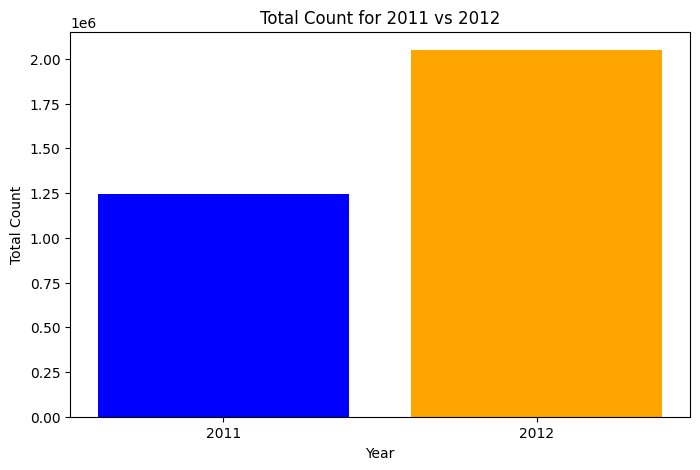

In [31]:
total_count_2011 = day_df_raw[day_df_raw['yr'] == 0]['cnt'].sum()
total_count_2012 = day_df_raw[day_df_raw['yr'] == 1]['cnt'].sum()

plt.figure(figsize=(8, 5))
plt.bar(['2011', '2012'], [total_count_2011, total_count_2012], color=['blue', 'orange'])

plt.xlabel('Year')
plt.ylabel('Total Count')
plt.title('Total Count for 2011 vs 2012')

plt.show()

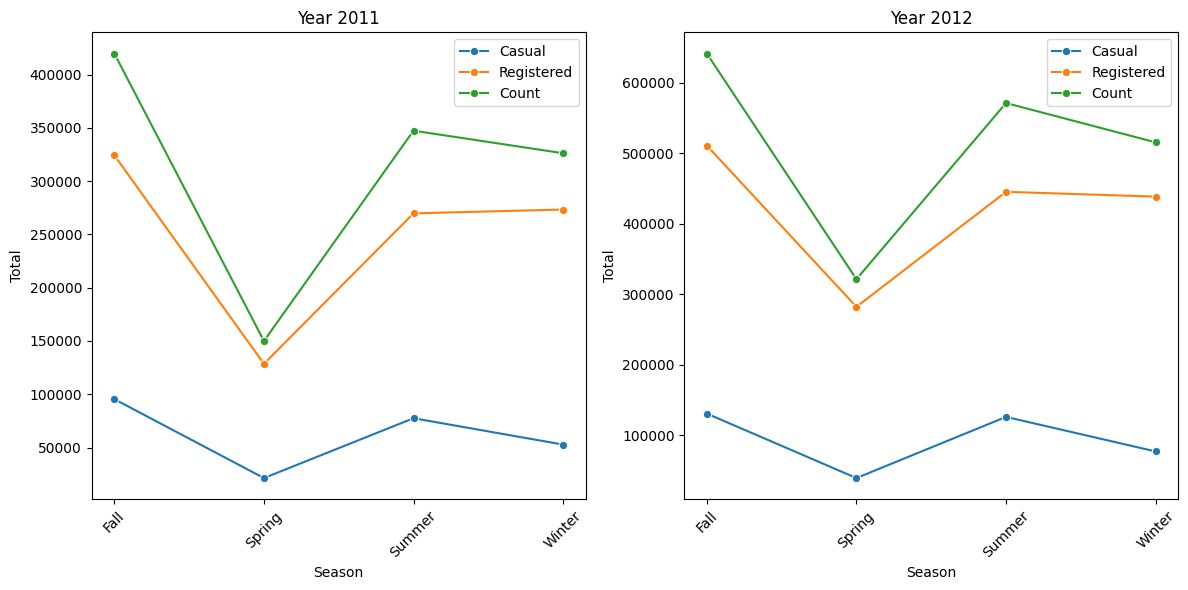

In [32]:
season_year_groups = day_df.groupby(['season', 'yr']).agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
})

year_2011 = season_year_groups.loc[(slice(None), 2011), :]
year_2012 = season_year_groups.loc[(slice(None), 2012), :]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sn.lineplot(data=year_2011, x=year_2011.index.get_level_values('season'), y='casual', marker='o', label='Casual')
sn.lineplot(data=year_2011, x=year_2011.index.get_level_values('season'), y='registered', marker='o', label='Registered')
sn.lineplot(data=year_2011, x=year_2011.index.get_level_values('season'), y='cnt', marker='o', label='Count')
plt.title('Year 2011')
plt.xlabel('Season')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.legend()

plt.subplot(1, 2, 2)
sn.lineplot(data=year_2012, x=year_2012.index.get_level_values('season'), y='casual', marker='o', label='Casual')
sn.lineplot(data=year_2012, x=year_2012.index.get_level_values('season'), y='registered', marker='o', label='Registered')
sn.lineplot(data=year_2012, x=year_2012.index.get_level_values('season'), y='cnt', marker='o', label='Count')
plt.title('Year 2012')
plt.xlabel('Season')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

### Pertanyaan 2:
Is there a correlation between the type of weather (Clear, Mist, LightSnow, HeavyRain) and the number of bicycles borrowed? What is the distribution of the number of bicycles borrowed in different weather conditions? Does temperature or humidity affect the number of bicycles borrowed?

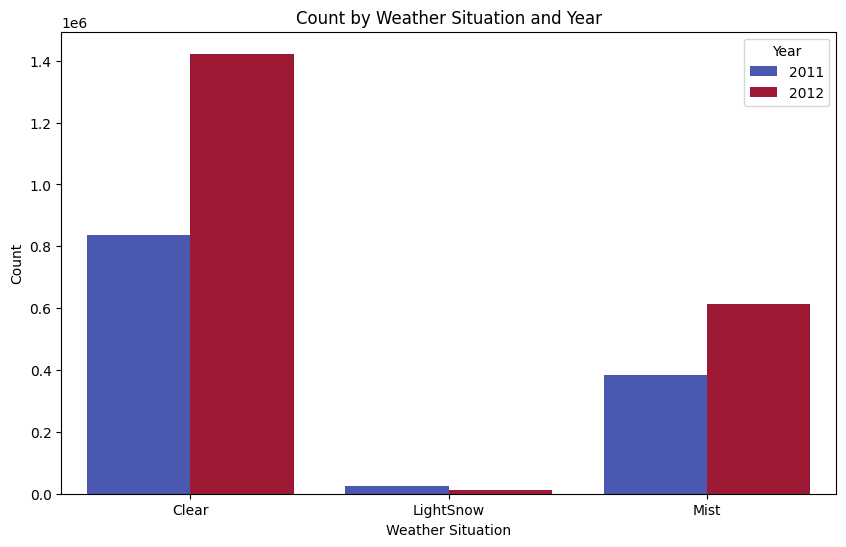

In [33]:
weather_count = day_df.groupby(['weathersit', 'yr']).agg({
    'cnt': 'sum'
}).reset_index()

plt.figure(figsize=(10, 6))
sn.barplot(x='weathersit', y='cnt', hue='yr', data=weather_count, palette='coolwarm')

plt.xlabel('Weather Situation')
plt.ylabel('Count')
plt.title('Count by Weather Situation and Year')

plt.legend(title='Year', loc='upper right')

plt.show()

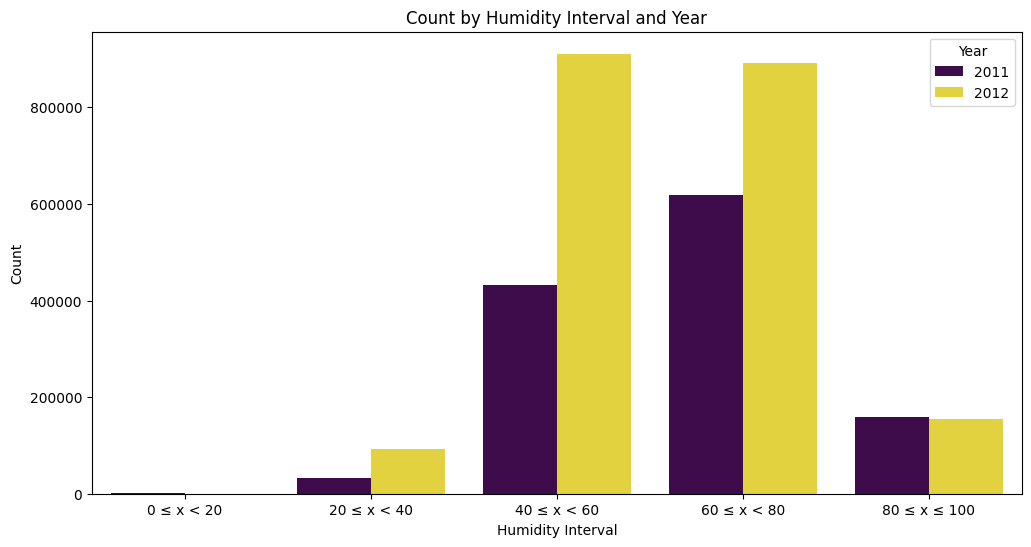

In [34]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
labels = ['0 ≤ x < 20', '20 ≤ x < 40', '40 ≤ x < 60', '60 ≤ x < 80', '80 ≤ x ≤ 100']
day_df['hum_interval'] = pd.cut(day_df['hum'], bins=bins, labels=labels, include_lowest=True)

hum_count = day_df.groupby(['hum_interval', 'yr']).agg({
    'cnt': 'sum'
}).reset_index()

plt.figure(figsize=(12, 6))
sn.barplot(x='hum_interval', y='cnt', hue='yr', data=hum_count, palette='viridis')

plt.xlabel('Humidity Interval')
plt.ylabel('Count')
plt.title('Count by Humidity Interval and Year')

plt.legend(title='Year', loc='upper right')

plt.show()

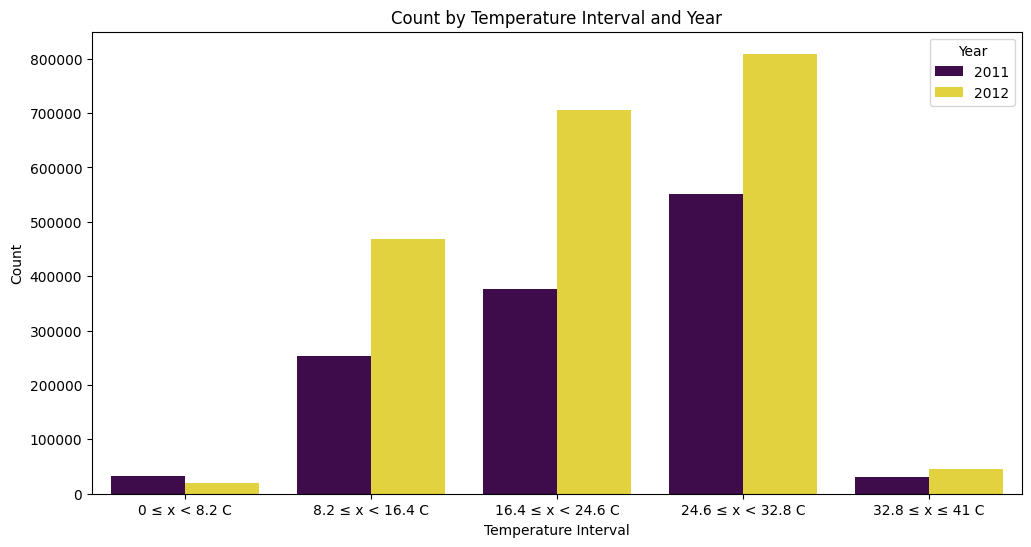

In [35]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
labels = ['0 ≤ x < 8.2 C', '8.2 ≤ x < 16.4 C', '16.4 ≤ x < 24.6 C', '24.6 ≤ x < 32.8 C', '32.8 ≤ x ≤ 41 C']
day_df['temp_interval'] = pd.cut(day_df['temp'], bins=bins, labels=labels, include_lowest=True)

temp_count = day_df.groupby(['temp_interval', 'yr']).agg({
    'cnt': 'sum'
}).reset_index()

plt.figure(figsize=(12, 6))
sn.barplot(x='temp_interval', y='cnt', hue='yr', data=temp_count, palette='viridis')

plt.xlabel('Temperature Interval')
plt.ylabel('Count')
plt.title('Count by Temperature Interval and Year')

plt.legend(title='Year', loc='upper right')

plt.show()

## Conclusion

#### Conclution Question 1

- First, let's look at a comparison graph between the total number of bicycles borrowed between 2011 and 2012. It can be seen that in 2011 the number of bicycles borrowed was less than in 2012.
- Furthermore, in the second graph, it can be seen that the Fall season is the peak of the number of bicycle borrowings that occur. Then the least amount of bicycles being borrowed is in the spring.


#### Conclution Question 2
- There is a correlation between weather conditions, temperature and humidity and the number of bicycle rentals that occur. In the first graph, it is clear that in both 2011 and 2012 there were a lot of bicycles borrowed when the weather was sunny, very few bicycles were borrowed when the weather was snowy and there were no bicycles borrowed when the weather was heavy rain.
- It can be seen from the second and third graphs that the graph will appear to increase as temperature and humidity increase.

In [37]:
day_df.to_csv("all_data.csv", index=False)